In [10]:
pip install pandas-profiling[notebook]

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [13]:
tip = pd.read_csv("tips.csv")
tip.head(10)

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6
5,2411.08,296.48,Female,Yes,Thur,Lunch,2
6,4607.43,374.96,Female,No,Thur,Dinner,4
7,1165.21,700.87,Female,No,Mon,Dinner,2
8,2895.04,347.71,Male,No,Sat,Dinner,5
9,2622.54,253.97,Male,Yes,Thur,Lunch,6


In [14]:
tip.shape

(744, 7)

In [15]:
tip.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

tip vs gender

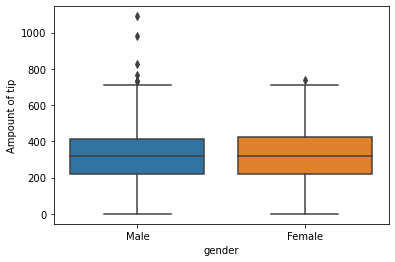

In [16]:
sns.boxplot(x = 'gender', y = 'tip', data = tip)
plt.ylabel('Ampount of tip');

tip vs smoker

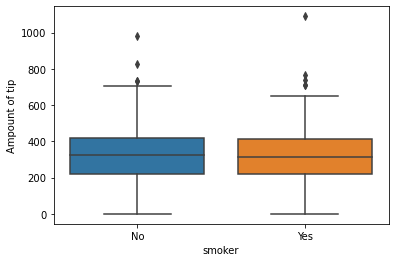

In [17]:
sns.boxplot(x = 'smoker', y = 'tip', data = tip)
plt.ylabel('Ampount of tip');

tip vs time

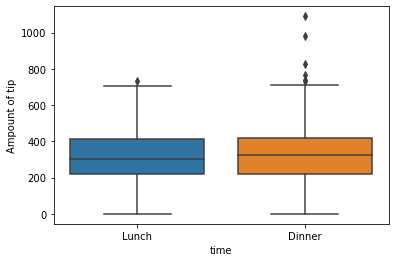

In [18]:
sns.boxplot(x = 'time', y = 'tip', data = tip)
plt.ylabel('Ampount of tip');

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [20]:
tip.head(4)

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1


In [21]:
X = tip.drop(['tip'], axis = 'columns')
y = tip['tip']

In [22]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [23]:
y.head()

0    360.79
1    259.42
2    274.68
3    337.90
4    567.89
Name: tip, dtype: float64

In [24]:
pd.get_dummies(X)

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,3164.27,3,0,1,1,0,0,0,1,0,0,0,0,1,0
740,2962.62,2,1,0,0,1,0,0,1,0,0,0,0,1,0
741,2471.03,2,0,1,0,1,0,0,1,0,0,0,0,1,0
742,1942.38,2,0,1,1,0,0,0,1,0,0,0,0,1,0


In [25]:
X = pd.get_dummies(X)

In [27]:
X.head()

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1


In [26]:
X.shape

(744, 15)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
linearmodel = LinearRegression()

linearmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [39]:
linearmodel.predict(X_test)

array([367.43848391, 284.17027121, 274.19116018, 346.46402511,
       298.85746332, 294.14453677, 257.66130848, 283.23527194,
       311.53154902, 266.76688909, 287.50691095, 268.12328087,
       319.29057874, 379.389987  , 298.34394797, 344.98937081,
       375.77087624, 345.96103113, 257.77234067, 383.58762963,
       301.02748847, 296.47261286, 377.37706494, 380.998273  ,
       323.44463928, 325.96091299, 296.45549431, 295.80850357,
       376.11352327, 394.93799767, 314.34660701, 252.39149885,
       371.36736855, 329.21139694, 309.21545846, 335.19229996,
       353.93437564, 292.97091347, 329.96148959, 302.46622122,
       248.40367105, 328.12726277, 343.86442963, 343.74524418,
       389.50836497, 321.67127403, 344.84535554, 358.10847206,
       328.46831958, 391.63641292, 307.10446628, 359.07045622,
       362.31824303, 386.93674845, 371.71312874, 326.74602401,
       327.49791297, 345.53085245, 323.75874404, 351.67709068,
       319.64524402, 313.14934587, 348.15326222, 360.45

In [40]:
linearmodel_prediction = linearmodel.predict(X_test)

In [41]:
y_test - linearmodel_prediction

535     24.961516
718   -127.210271
277    117.118840
391     29.585975
586    -80.857463
          ...    
28     251.233516
146   -113.455516
616    159.553272
234     27.214263
359     33.720087
Name: tip, Length: 149, dtype: float64

In [42]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)

In [43]:
MSE

20201.41527694898

In [44]:
np.sqrt(MSE)

142.1316828752442

In [46]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()

randomforestmodel.fit(X_train, y_train)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

RandomForestRegressor()

In [47]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [48]:
MSE = metrics.mean_squared_error(y_test, randomforestmodel_prediction)

In [49]:
MSE

25053.893905510606

In [50]:
np.sqrt(MSE)

158.28421875067207

In [52]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [57]:
from xgboost import XGBRegressor

In [58]:
xgboostmodel = XGBRegressor(use_label_encoder=False)

xgboostmodel = xgboostmodel.fit(X_train, y_train)

In [59]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [61]:
MSE = metrics.mean_squared_error(y_test, xgboostmodel_prediction)

In [62]:
MSE

29250.892630941566

In [63]:
np.sqrt(MSE)

171.0289233753799

In [64]:
from sklearn.svm import SVR

In [67]:
SVMmodel = SVR()

In [75]:
SVMmodel.fit(X_train, y_train)

SVR()

In [76]:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR()

In [78]:
SVMmodel_prediction = SVMmodel.predict(X_test)

In [79]:
MSE = metrics.mean_squared_error(y_test, SVMmodel_prediction)

In [80]:
MSE

19853.340298954365

In [81]:
np.sqrt(MSE)

140.90188181480886

In [84]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor()

decisiontree.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
decisiontree.predict(X_test)

array([ 218.  ,  545.  ,  456.71,  566.8 ,  299.75,   18.53,  215.82,
        214.73,  430.55,  265.96,  316.1 ,  224.54,  276.86,  227.81,
        156.96,  261.6 ,  513.39,  250.7 ,  510.12,  545.  ,  170.04,
        156.96,  554.81,  322.64,  294.3 ,  312.83,  268.14,  352.07,
        567.89,  250.7 ,  327.  ,  224.54,  344.44,  566.8 ,  219.09,
        499.22,  390.22,  272.5 ,  556.99,  355.34,  336.81,  566.8 ,
        247.43,  158.05,  327.  ,  333.54,  279.04,  317.19,  334.63,
        294.3 ,  158.05,  299.75,  409.84,  560.26,   63.22,  199.47,
        427.28,  545.  ,  327.  ,  313.92,  381.5 ,  490.5 ,  381.5 ,
        231.08,  213.64,  246.34,  556.99,  346.62,  492.68,  733.57,
        306.29,  262.69, 1090.  ,  381.5 ,  334.63,  456.71,  218.  ,
        385.86,  307.38,  327.  ,    4.36,  456.71,  602.77,    4.36,
        398.94,  333.54,  268.14,  404.39,  300.84,  199.47,  495.95,
        421.83,  648.55,  436.  ,  191.84,  267.05,  347.71,  218.  ,
        401.12,  247

In [91]:
MSE

19853.340298954365

In [92]:
np.sqrt(MSE)

140.90188181480886